<a href="https://colab.research.google.com/github/vicentesarabia/ADA_informes/blob/main/Informe11_Ordentropologica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.-Problema

Entrada: Grafo sin ciclos G (V,E)

Salida: uno de los órdenes topologicos que tiene el grafo

# 2.- Descripción del algoritmo

**2.1 descripción orden topológico**

El algoritmo de orden topológico lo que busca hacer es ordenar un grafo, grafo el que no tienen ciclos, para el ordenamiento topológico se considera que cuando un nodo A está apuntando a un nodo B y este nodo B apunta a un nodo C
para poder ingresar al nodo C el prerrequisito es que se tiene que pasar por el nodo B y para entrar al nodo B se tiene que pasar al nodo A por lo que el orden topológico quedaría de la siguiente forma:





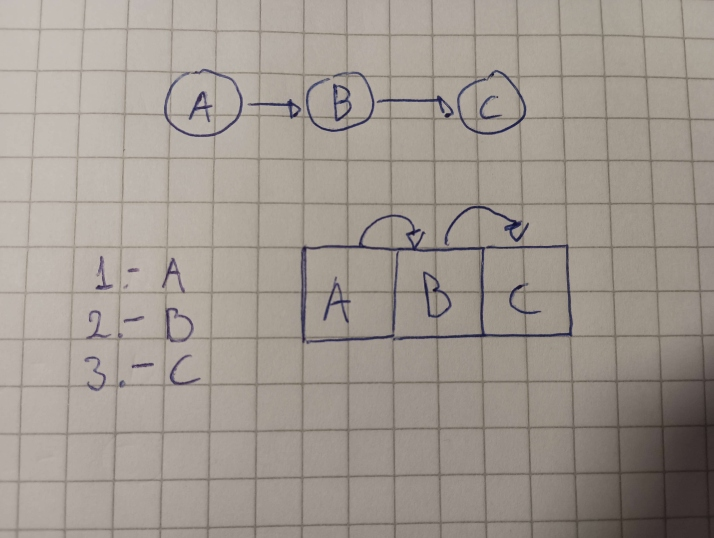

**2.2 Implementación iterativo** 

El algoritmo de orden topológico se basa principalmente en el DFS en el cual el primer paso del algoritmo es crear una lista la cual nos ayudara a guardas el cual será el orden topológico de los nodos

Luego el algoritmo aplica DFS en post-orden para cada uno de los nodos de nuestro grafo, cuando uno de los nodos del grafo es visitado este se agrega a la lista auxiliar creada anteriormente

 Luego se retorna nuestra lista auxiliar con nuestros nodos, pero en reversa, respuesta la cual es una de las combinaciones de orden topológico posible.

In [126]:
def topologicalSortIterativo(T,verbose):
  estado = dict()
  
  for n in T: estado[n] = "no descubierto"
  ListaAux = []
  if verbose==True:print("estado inicial",estado)
  for n in T:
    pila = [n]
    
    # DFS de forma post-orden
    while len(pila)>0:
      if verbose==True:print("pila",pila)
      n=pila.pop()
      
      #print("valor de n con pop de pila",n)
           
      if estado[n] == "no descubierto":

        estado[n] = "descubierto"
        if verbose==True:print(estado)
        pila.append(n)
        for adjNode in reversed(list(T[n])):
          if estado[adjNode] == "no descubierto":
            pila.append(adjNode)
      elif estado[n]=="descubierto" and estado[n] != "visitado":
        estado[n]="visitado"
        if verbose==True:print(estado,"visitados")
        
        ListaAux.append(n)
        if verbose==True:print(ListaAux,"lista actual")
  ListaAux = list(reversed(ListaAux))
  return ListaAux

**2.3 Implementación recursiva**
 
Primero el algoritmo marca todos los nodos como true luego esta llama a una función ampliar recursiva para almacenar el orden topológico, luego se aplica la función de recurrencia para todos los nodos adyacentes al nodo para luego insertar el nodo actual al snack que almacena el resultado del orden topológico.

In [127]:
def SortRecursivo(G,n,estado,stack):
  estado[n] = True
  for adj in G[n]:
    if estado[adj] == False:
      SortRecursivo(G,adj,estado,stack)
  stack.insert(0,n)
  

def TopologicalSortRecursivo(G):
  estado = dict()
  for j in G: estado[j] = False
  stack = []
  for j in G:
    if estado[j] == False:
      SortRecursivo(G,j,estado,stack)
  return stack




**2.4 verbose = true y visualice=True**

A continuacion verbose=True

In [128]:
from collections import defaultdict
import math
import random

# Crea un grafo sin ciclos de nodos de 0 a V - 1
# Retorna un dicionario [defaultdict(list)] 
# de key valor del nodo (0 a V - 1) y de value una 
# lista con los nodos a los cuales se conecta
def graph_instance_creator(V):
  nodes = random.sample(range(0, V), V)
  div = int(math.ceil(V / 4))

  current_div = div
  graph = defaultdict(list)
  for i in reversed(range(len(nodes))):
    selectables = []
    if (len(nodes) - current_div <= 0):
      selectables = random.sample(nodes, random.randint(1, len(nodes)))
    else:
      population = nodes[:len(nodes)-current_div]
      end = len(population) if len(population) < 4 else 4
      selectables = random.sample(population, random.randint(1, end))
    for selectable in selectables:
      if (nodes[i] != selectable and not selectable in graph[nodes[i]]):
        graph[nodes[i]].append(selectable)
    if (i < len(nodes) - current_div):
      current_div += div

  return graph




estado inicial {3: 'no descubierto', 4: 'no descubierto', 2: 'no descubierto', 0: 'no descubierto', 1: 'no descubierto'}
pila [3]
{3: 'descubierto', 4: 'no descubierto', 2: 'no descubierto', 0: 'no descubierto', 1: 'no descubierto'}
pila [3, 2, 4]
{3: 'descubierto', 4: 'descubierto', 2: 'no descubierto', 0: 'no descubierto', 1: 'no descubierto'}
pila [3, 2, 4, 2]
{3: 'descubierto', 4: 'descubierto', 2: 'descubierto', 0: 'no descubierto', 1: 'no descubierto'}
pila [3, 2, 4, 2]
{3: 'descubierto', 4: 'descubierto', 2: 'visitado', 0: 'no descubierto', 1: 'no descubierto'} visitados
[2] lista actual
pila [3, 2, 4]
{3: 'descubierto', 4: 'visitado', 2: 'visitado', 0: 'no descubierto', 1: 'no descubierto'} visitados
[2, 4] lista actual
pila [3, 2]
pila [3]
{3: 'visitado', 4: 'visitado', 2: 'visitado', 0: 'no descubierto', 1: 'no descubierto'} visitados
[2, 4, 3] lista actual
pila [4]
pila [2]
pila [0]
{3: 'visitado', 4: 'visitado', 2: 'visitado', 0: 'descubierto', 1: 'no descubierto'}
pila [0,

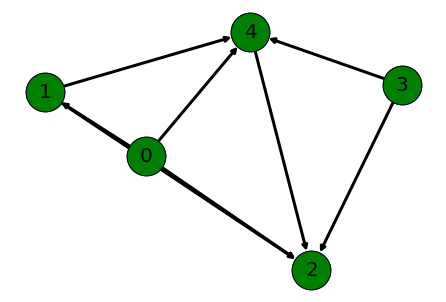

In [129]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

# Recibe un grafo de tipo [defaultdict(list)]
# Retorna un nx.DiGraph de la libreria networkx
def graph_to_nxdigraph(graph,visulice):
  nxdigraph = nx.DiGraph()
  for i in graph.keys():
    nxdigraph.add_node(i)
    for v in graph[i]:
      nxdigraph.add_edge(i, v)
  if visualice==True:
    
    labels={}

    G= nxdigraph

    for n in G:
      if "label" in G.nodes[n]: labels[n]=G.nodes[n]["label"]
    T_labeled = nx.relabel_nodes(G, labels, copy=True)

# ve las posiciones y lo deja de forma mas lindo
    pos=nx.spring_layout(G)



    nx.draw(T_labeled, pos, with_labels=True,node_size=1500, font_color="black", font_size=20, width  =3.0)
    nodes = nx.draw_networkx_nodes(T_labeled, pos,node_size=1500, node_color="green")
    nodes.set_edgecolor('black')  
    

  
  return nxdigraph

visualice=True
verbose=True
G=graph_to_nxdigraph(graph_instance_creator(5),visualice)
print("Resultado algoritmo iterativo",topologicalSortIterativo(G,verbose))
print("Resultado algoritmo recursivo",TopologicalSortRecursivo(G))


**2.5 Ejemplo**

Para este ejemplo se utilizara el siguiente grafo:


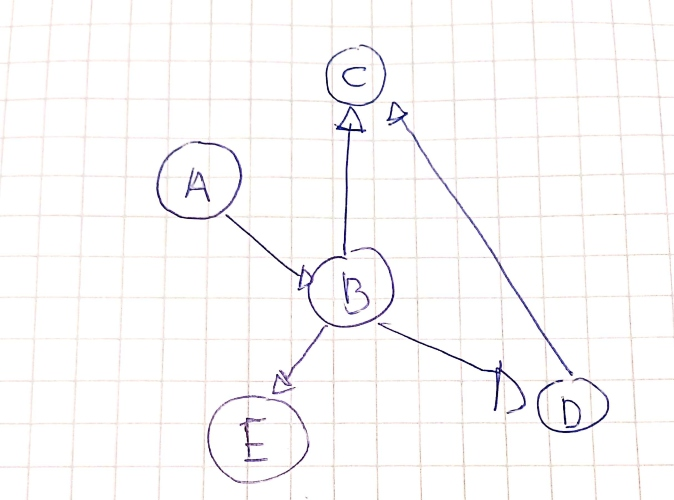

Lo primero es crear un arreglo con la etiqueta de el nodo y asignarle 0 a cada uno de ellos

0 0 0 0 0

A B C D E

Luego observamos el nodo A y podemos observar que este está conectado con el nodo B por lo que en el arreglo se le suma uno a B

0 1 0 0 0

A B C D E

Ahora observamos el nodo B el cual apunta a los nodos E,D,C por lo que se suma a cada uno de los nodos 1

0 1 1 1 1

A B C D E

Ahora el nodo C el cual no apunta hacia ningún nodo, por lo que el arreglo queda igual

0 1 1 1 1

A B C D E

El nodo D apunta al nodo C por lo que se le suma 1


0 1 2 1 1

A B C D E

y el nodo E no apunta a nada por lo que queda igual

ahora se ingresa los nodos que tiene grado 0 en el arreglo a una pila

pila: A

como no hay más nodos de grado 0 se analiza el nodo para ver cuáles son sus conexiones, como el nodo A esta conectado con el nodo B al nodo B en el arreglo se le resta 1, queda el nodo A como el primero de nuestro orden topológico

1.-A

0 2 1 1

B C D E

se ingresa B a la pila

pila: B

de igual forma se revisa cuáles son los nodos conectados de B para restarle a los nodos el cual está conectado

1.-A
2.-B

1 0 0

C D E

se ingresa D y E a la pila

pila: D,E

se revisa D y E si tiene conexiones, el orden de estos puede quedar de dos formas

1.-A
2.-B
3.-E
4.-D

o

1.-A
2.-B
3.-D
4.-E

como el único nodo que nos queda en el arreglo es C este queda al final por lo que el resultado queda

[A,B,E,D,C]  O  [A,B,D,E,C] 








# 3.- Correctitud

**3.1 teorema correctitud orden topológico**

Para cualquier asignación de f(u) y f(v) de una unión(u,v) se cumple la condición de f(u)<f(v).

**3.2 prueba teorema**

Para poder probar esta correctitud se tiene que observar el DFS el cual utiliza un stack el cual tiene la lógica de la pila, en cada ciclo del while primero se agrega un nodo padre y después sus hijos.

Si analizamos la conexión de u y v corresponde a un nodo descubierto y no visitado de u o no descubierto.

Si v es no descubierto se marca como cubierto, luego v descubierto se marcara como visitado y finalmente se retira de la pila y se le agrega e valor de f(v)

Si v es descubierto y visitado no entra a la pila.

Cuando u salga del stack se le asignara un valor de f(u), que será mayor a f(v) por lo que saldrá después por lo que el algoritmo es correcto.


#4.- Tiempo de ejecución

**4.1 teorema tiempo de ejecución orden topológico**

El algoritmo de orden topológico tiene un tiempo de ejecución de O(n+a).

**4.2 prueba de teorema**

El tiempo de ejecución de este algoritmo es fácil de ver, ya que el algoritmo ingresa solo una vez el nodo a la pila y esta acción tiene un tiempo de ejecución de O(n)

Ahora por nodo el algoritmo recurre una sola vez sus conexiones, lo que nos dará al final la cantidad total de arcos acción la cual tiene una complejidad temporal de O(a)

Luego, para finalizar la unión de la acción nos da que el algoritmo de orden topológico tiene un tiempo de ejecución de O(n+a) lo cual es correcto.

# 5.- Experimentos

En este experimento se observará la diferencia en el tiempo de ejecución de los algoritmo de orden topológico de forma iterativa vs recursiva.

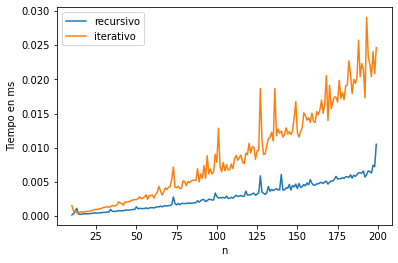

In [130]:
import random
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
x,y,y1 = [],[],[]

for n in range(10,200):

  visualice=False
  verbose=False
  G=graph_to_nxdigraph(graph_instance_creator(n),visualice)

  
  t = repeat(setup="from __main__ import TopologicalSortRecursivo", stmt=lambda: TopologicalSortRecursivo(G), repeat=1, number=10)
  j = repeat(setup="from __main__ import topologicalSortIterativo", stmt=lambda: topologicalSortIterativo(G,verbose), repeat=1, number=10)

  x.append(n)
  y.append(t)
  y1.append(j)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["recursivo","iterativo"])


plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

**observaciones y análisis**

Como se puede observar el algoritmo recursivo tiene un mejor tiempo de ejecución vs el algoritmo recursivo y esto se puede ver debido a su tiempo de ejecucion, ya que depende de la cantidad de conexiones que tiene el nodo el cual el algoritmo iterativo compila más.